# Confidence Intervals

A **confidence interval (CI)** is a range of values, derived from sample data, that is likely to contain the true population parameters (like a mean or proportion) with a certain level of confidence.

In our example, to estimate a population’s average profit of ice cream shops, we can randomly select 10 shops and calculate the sample mean salary. We repeated this process 500 times to get a sample mean distribution. The graph below shows the distribution of these sample means. The shaded region represents the 95% confidence interval, meaning if we were to repeat the sampling procedure 100 times and take the 95% interval for each, 95 out of 100 of these intervals would contain the true population mean. 

# Imports

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.patches import Polygon

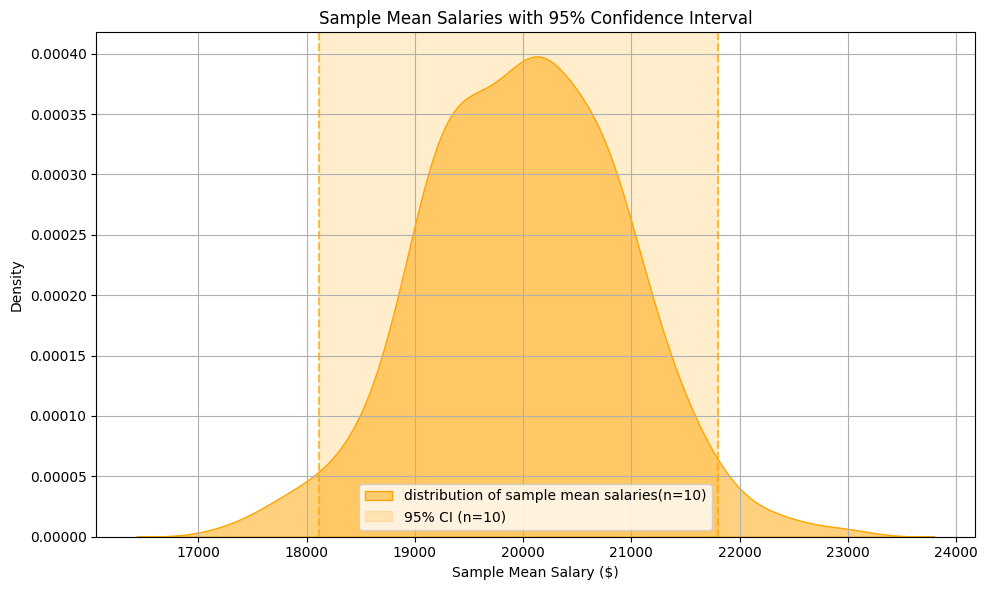

Lower bound: 18113.189564695564 
Upper bound: 21803.41798093972


In [79]:
# Set random seed
np.random.seed(42) #ensure code is the same everytime

data = np.random.normal(loc=20000, scale=3000, size=5000)

# take sample
def get_sampling(sample_size, n_trials=500):
    means = []
    for _ in range(n_trials):
        sample = np.random.choice(data, size=sample_size, replace=False)
        means.append(np.mean(sample))
    return np.array(means)

sampling = get_sampling(sample_size=10)

# Compute 95% empirical confidence interval
def compute_ci(d, confidence_level):
    alpha = 1 - confidence_level
    lower = np.percentile(d, 100 * (alpha / 2)) #using percentage approach because d is already the sample means
    upper = np.percentile(d, 100 * (1 - alpha / 2))
    return lower, upper

ci = compute_ci(sampling, 0.95)

# Plot 
plt.figure(figsize=(10, 6))
sns.kdeplot(sampling, label="distribution of sample mean salaries(n=10)", fill=True, color='orange', alpha=0.5)

# Highlight 95% CI band
plt.axvspan(ci[0], ci[1], color='orange', alpha=0.2, label="95% CI (n=10)")
plt.axvline(ci[0], color='orange', linestyle='--', alpha=0.7)
plt.axvline(ci[1], color='orange', linestyle='--', alpha=0.7)

# Labels
plt.title("Sample Mean Salaries with 95% Confidence Interval")
plt.xlabel("Sample Mean Salary ($)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Lower bound: {ci[0]} \nUpper bound: {ci[1]}")

## Common confidence levels

Common confidence levels include **90%**, **95%**, and **99%**, but these values are ultimately **arbitrary conventions**. They reflect how confident we want to be that our interval contains the true population parameter. A higher confidence level means a wider interval, offering more certainty but less precision. In another word, the more values we include in the range, the more confident we are. 

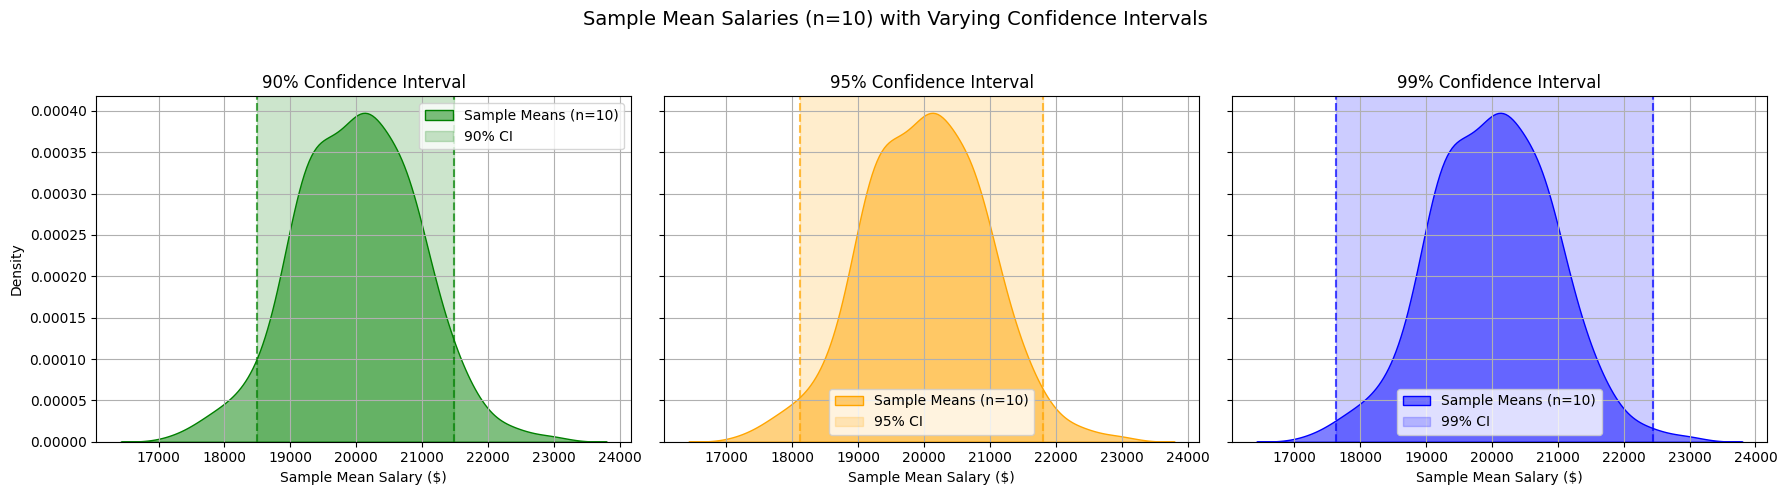

In [80]:
# Confidence levels
confidence_levels = [0.90, 0.95, 0.99]
colors = ['green', 'orange', 'blue']

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, conf, color in zip(axes, confidence_levels, colors):
    ci = compute_ci(sampling, conf)
    sns.kdeplot(sampling, ax=ax, fill=True, color=color, alpha=0.5, label=f"Sample Means (n=10)")
    ax.axvspan(ci[0], ci[1], color=color, alpha=0.2, label=f"{int(conf*100)}% CI")
    ax.axvline(ci[0], color=color, linestyle='--', alpha=0.7)
    ax.axvline(ci[1], color=color, linestyle='--', alpha=0.7)
    ax.set_title(f"{int(conf*100)}% Confidence Interval")
    ax.set_xlabel("Sample Mean Salary ($)")
    ax.grid(True)
    ax.legend()

axes[0].set_ylabel("Density")
plt.suptitle("Sample Mean Salaries (n=10) with Varying Confidence Intervals", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Importance of COnfidence Intervals

Confidence intervals are important because:

- **They reflect uncertainty**. Instead of giving just a single estimate (like a sample mean), they provide a range, acknowledging sample variability.

- **They support statistical reasoning**. CIs help us understand how precise our estimates are.

- **They enable comparison**. If two confidence intervals do not overlap, this often (but not always) suggests a statistically significant difference.

- **They are more informative than p-values**. A CI tells you the magnitude and direction of an effect, not just whether it’s “significant”.


## Confidence Interval Formula and Example Illustration

When estimating the **population mean** from a sample, the formula for a confidence interval is:

$$
\text{CI} = \bar{x} \pm z^* \cdot \frac{s}{\sqrt{n}}
$$

Where:

- $\bar{x}$ is the sample mean

- $s$ is the sample standard deviation

- $n$ is the sample size

- $\frac{s}{\sqrt{n}}$ is the **standard error** of the mean

- $z^*$ is the **critical value** from the standard normal distribution (depends on confidence level)

When the **population standard deviation (σ)** is unknown — which is almost always the case in real-world studies — the correct formula uses the **t-distribution** instead of the z-distribution.

$$
\text{CI} = \bar{x} \pm t^* \cdot \frac{s}{\sqrt{n}}
$$

Where:

- $\bar{x}$ = sample mean

- $s$ = sample standard deviation

- $n$ = sample size

- $\frac{s}{\sqrt{n}}$ = standard error

- $t^*$ = critical value from the t-distribution with df = n - 1

The code above used a percentile approach to illustrate the idea of taking sample means. Alternatively, with the formula, we could also apply the formula to ge the range. It is important, however, to note that this range is still a range on the sample mean distribution, not the raw data. The formula also assumes normality of the sample mean distribution, so unless normality is guaranted, percentage approach.

(HELLPPPPP)

Lower bound: 17997.54807649254 
Upper bound: 22018.091300781885


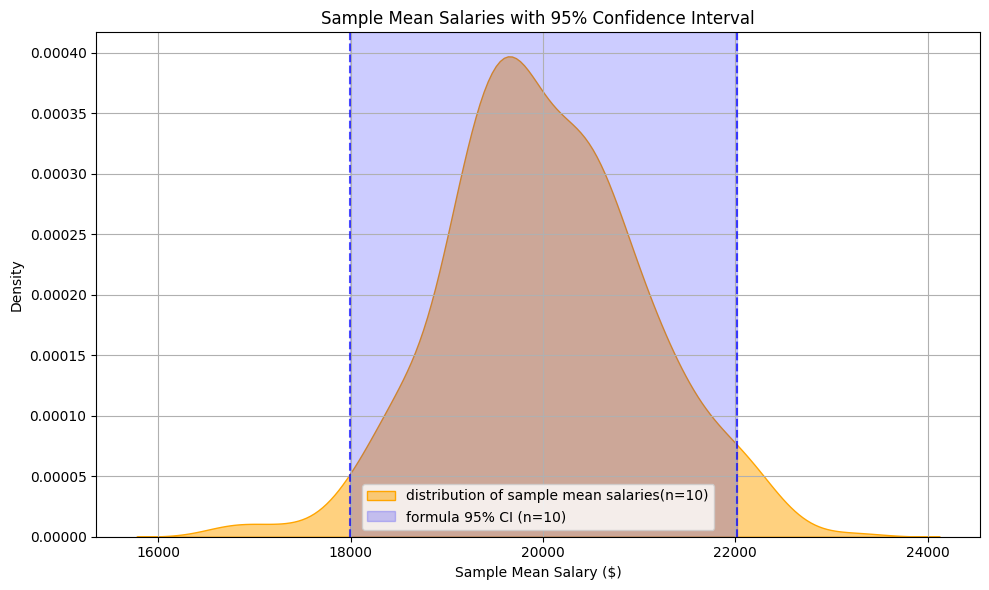

In [92]:
# simulate a set of normally distributed sample means 
means = np.random.normal(loc=20000, scale=1000, size=500)

def compute_ci_formula(d, confidence=0.95):
    mean = np.mean(d)
    se = np.std(d, ddof=1)  # SD of sample means
    t_crit = stats.t.ppf(1 - (1-confidence)/2, df=len(d)-1)
    lower = mean - t_crit * se
    upper = mean + t_crit * se
    return lower, upper

l, u = compute_ci_formula(means)
print(f"Lower bound: {l} \nUpper bound: {u}")

# Plot 
plt.figure(figsize=(10, 6))
sns.kdeplot(means, label="distribution of sample mean salaries(n=10)", fill=True, color='orange', alpha=0.5)

# Highlight 95% CI band
plt.axvspan(l, u, color='blue', alpha=0.2, label="formula 95% CI (n=10)")
plt.axvline(l, color='blue', linestyle='--', alpha=0.7)
plt.axvline(u, color='blue', linestyle='--', alpha=0.7)

# Labels
plt.title("Sample Mean Salaries with 95% Confidence Interval")
plt.xlabel("Sample Mean Salary ($)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The following code is an experiment to illustrate how **confidence intervals** (using the t-distribution) behave when sampling from a **non-normal population**.

A right-skewed population was generated, and its **distribution** and **histogram** are shown below to demonstrate that the population is not normally distributed.

We then ran 10 independent sampling experiments. In each experiment, we randomly selected **40 data points** from the population. We calculated the **sample mean** and the corresponding **95% confidence interval** using the **t-distribution**. Each confidence interval was visualized alongside the true population mean.

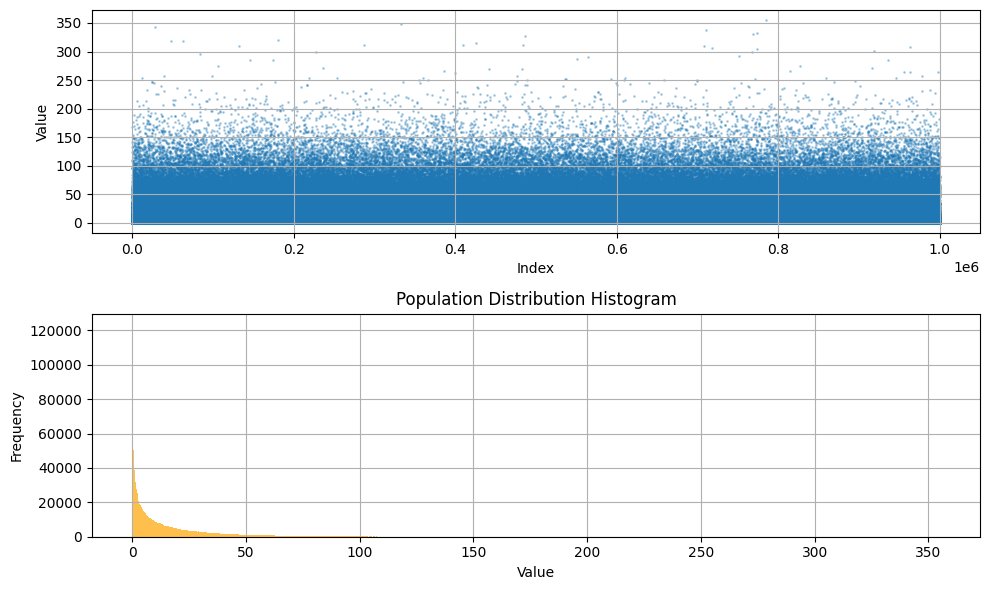

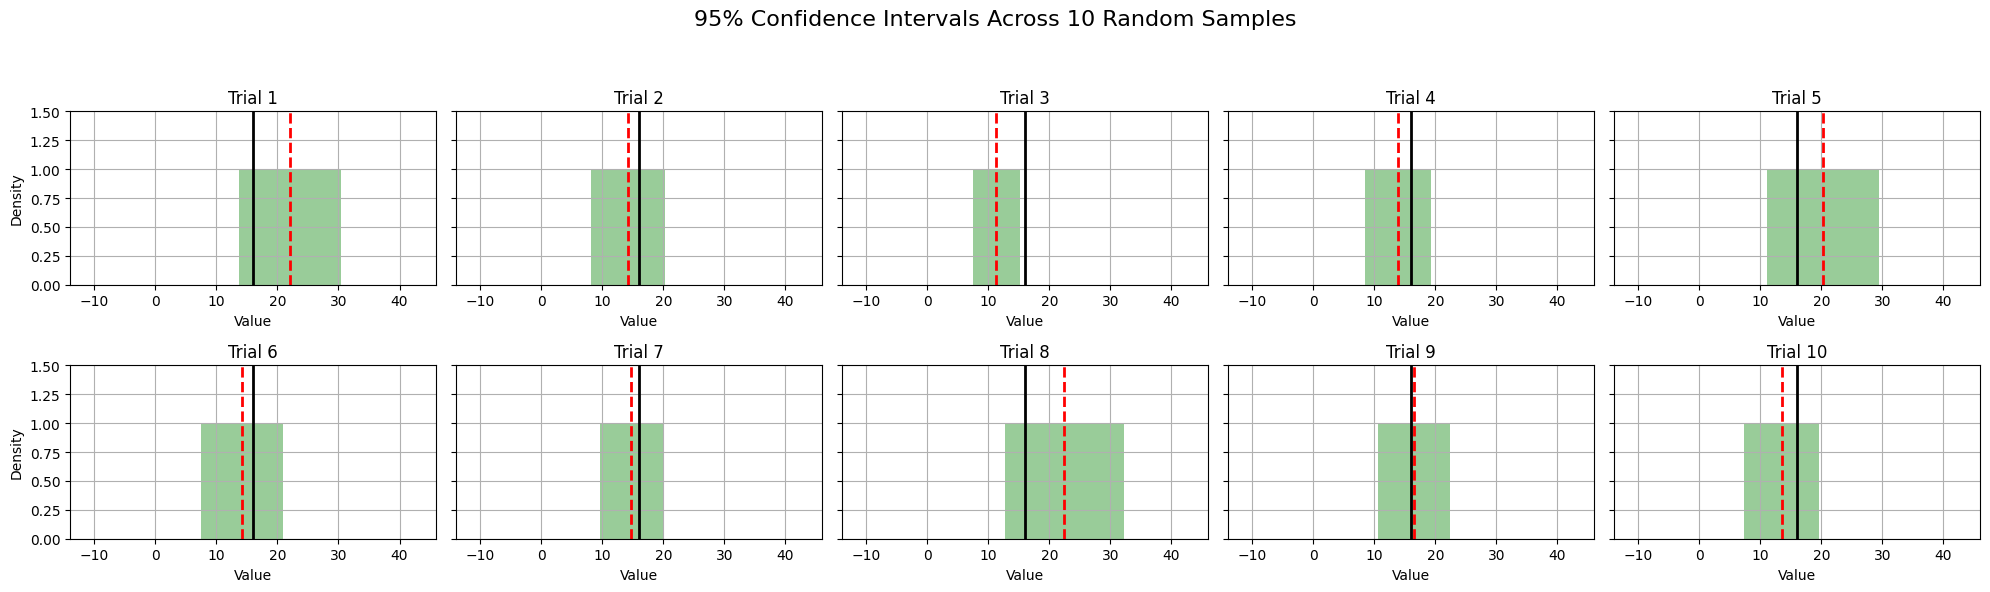

In [93]:
popN = int(1e6)

population = (4*np.random.randn(popN))**2

popMean = np.mean(population)

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].scatter(range(len(population)), population, s=1, alpha=0.3)
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Value')
ax[0].grid(True)

ax[1].hist(population, bins='fd', color='orange', alpha=0.7)
ax[1].set_title('Population Distribution Histogram')
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)
plt.tight_layout()
plt.show()

# Generate a non-normal population
popN = int(1e7)
population = (4 * np.random.randn(popN))**2  # right-skewed distribution
popMean = np.mean(population)

# Settings
samplesize = 40
confidence = 95
alpha = 1 - confidence / 100

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 6), sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

for i, ax in enumerate(axes):
    # Draw a random sample
    sample = np.random.choice(population, size=samplesize, replace=False)
    samplemean = np.mean(sample)
    samplestd = np.std(sample, ddof=1)

    # Compute 95% confidence interval
    t_crit = stats.t.ppf([alpha / 2, 1 - alpha / 2], df=samplesize - 1)
    confint = samplemean + t_crit * (samplestd / np.sqrt(samplesize))

    # Create shaded confidence interval
    y = np.array([[confint[0], 0], [confint[1], 0], [confint[1], 1], [confint[0], 1]])
    p = Polygon(y, facecolor='green', alpha=0.4)
    ax.add_patch(p)

    # Add mean lines
    ax.plot([popMean, popMean], [0, 1.5], 'k-', linewidth=2)              # Population mean
    ax.plot([samplemean, samplemean], [0, 1.5], 'r--', linewidth=2)       # Sample mean

    # Axis settings
    ax.set_xlim(popMean - 30, popMean + 30)
    ax.set_ylim(0, 1.5)
    ax.set_title(f"Trial {i+1}")
    ax.set_xlabel("Value")
    if i % 5 == 0:
        ax.set_ylabel("Density")
    ax.grid(True)

# Add overall title
fig.suptitle("95% Confidence Intervals Across 10 Random Samples", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

We have the following observation:

- The green shaded region shows the 95% confidence interval for each sample.
- The black vertical line marks the true population mean.
- The red dashed line marks the sample mean.
- Even though the population is not normal, the Central Limit Theorem ensures that the sampling distribution of the mean is approximately normal (since n = 40), allowing t-based confidence intervals to remain valid.

As expected with a 95% confidence level, the true mean falls within the interval in most of the trials.

## How to Influence the Size of a Confidence Interval

From the confidence interval formula:

$\text{CI} = \bar{x} \pm t^* \cdot \frac{s}{\sqrt{n}}$

We can tell that the **width of the confidence interval** is influenced by two key factors:

- **Sample size**, $n$: As $n$ increases, the standard error $\frac{s}{\sqrt{n}}$ decreases, so the CI becomes samller (narrow).

- **Sample standard deviation**, $s$: As the variance (or standard deviation) decreases, the CI also becomes smaller (narrow).


### Situation 1: Effect of Increasing Sample Size

Let’s demonstrate how a larger sample size makes the confidence interval narrower.

- Study 1: Sample 10 people, calculate average salary, repeat 500 times.

- Study 2: Sample 80 people, calculate average salary, repeat 500 times.

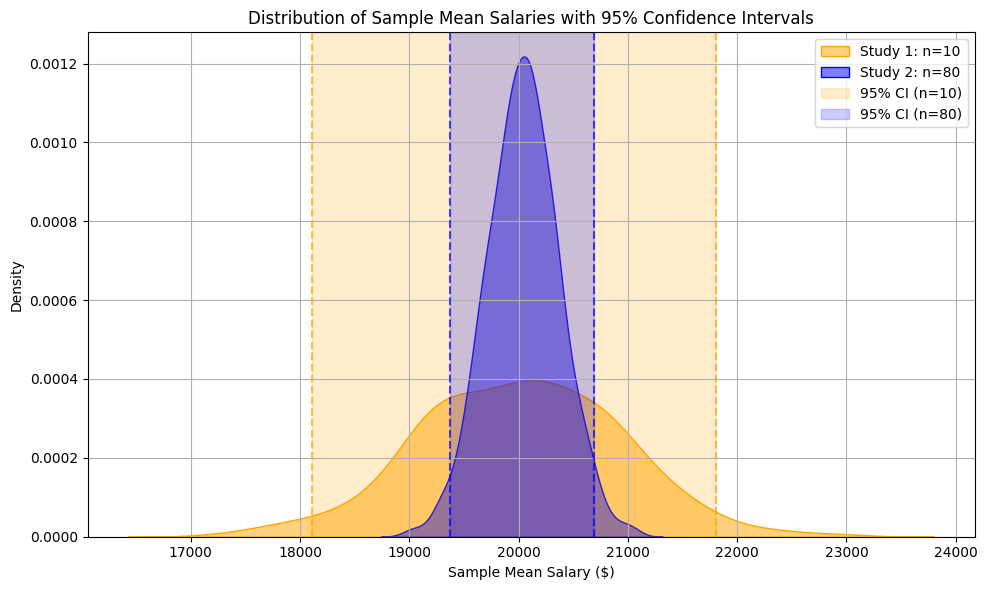

In [83]:
# Set random seed
np.random.seed(42)

data = np.random.normal(loc=20000, scale=3000, size=5000)

# take sample
def get_sampling(sample_size, n_trials=500):
    means = []
    for _ in range(n_trials):
        sample = np.random.choice(data, size=sample_size, replace=False)
        means.append(np.mean(sample))
    return np.array(means)

# Run experiments
sampling1 = get_sampling(sample_size=10)
sampling2 = get_sampling(sample_size=80)

# Compute 95% empirical confidence intervals
def compute_ci(data):
    lower = np.percentile(data, 2.5)
    upper = np.percentile(data, 97.5)
    return lower, upper

ci1 = compute_ci(sampling1)
ci2 = compute_ci(sampling2)

# Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sampling1, label="Study 1: n=10", fill=True, color='orange', alpha=0.5)
sns.kdeplot(sampling2, label="Study 2: n=80", fill=True, color='blue', alpha=0.5)

# Highlight 95% CI bands
plt.axvspan(ci1[0], ci1[1], color='orange', alpha=0.2, label="95% CI (n=10)")
plt.axvspan(ci2[0], ci2[1], color='blue', alpha=0.2, label="95% CI (n=80)")

# CI boundaries
plt.axvline(ci1[0], color='orange', linestyle='--', alpha=0.7)
plt.axvline(ci1[1], color='orange', linestyle='--', alpha=0.7)
plt.axvline(ci2[0], color='blue', linestyle='--', alpha=0.7)
plt.axvline(ci2[1], color='blue', linestyle='--', alpha=0.7)

# Labels
plt.title("Distribution of Sample Mean Salaries with 95% Confidence Intervals")
plt.xlabel("Sample Mean Salary ($)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Situation 2:  Effect of Variance (Standard Deviation)

- Study 1: Sample 30 people from a population with standard deviation = $5,000, repeat 500 times.

- Study 2: Sample 30 people from a population with standard deviation = $15,000, repeat 500 times.



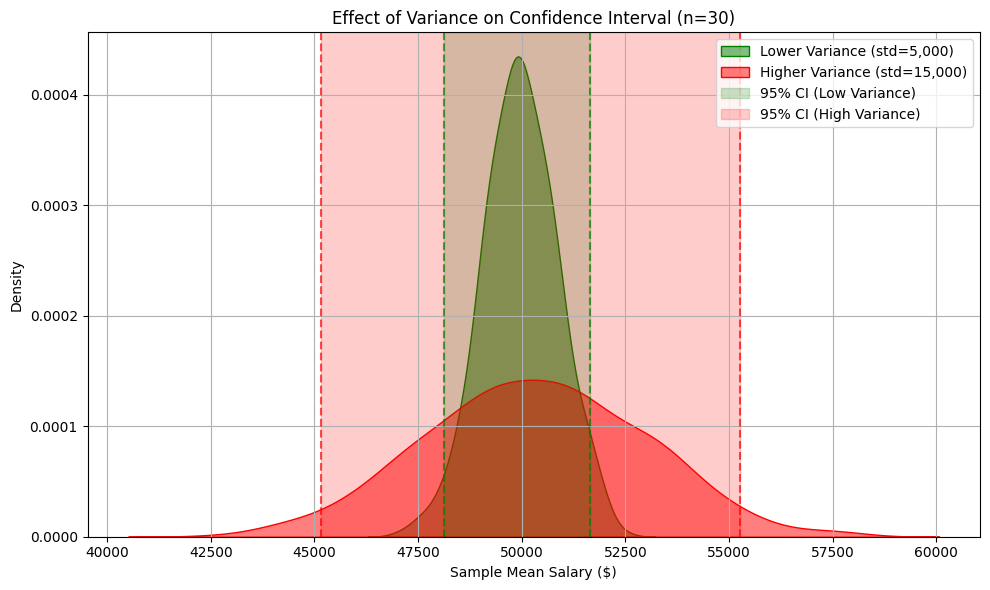

In [84]:
# Set random seed
np.random.seed(42)

# Population means stay the same; only std changes
population_low_var = np.random.normal(loc=50000, scale=5000, size=10000)   # lower variance
population_high_var = np.random.normal(loc=50000, scale=15000, size=10000) # higher variance

# Sampling function
def run_sampling_experiment(population, sample_size=30, n_trials=500):
    means = []
    for _ in range(n_trials):
        sample = np.random.choice(population, size=sample_size, replace=False)
        means.append(np.mean(sample))
    return np.array(means)

# Run experiments for low and high variance
low_var_means = run_sampling_experiment(population_low_var)
high_var_means = run_sampling_experiment(population_high_var)

# Compute 95% empirical confidence intervals
def compute_ci(data):
    return np.percentile(data, 2.5), np.percentile(data, 97.5)

ci_low = compute_ci(low_var_means)
ci_high = compute_ci(high_var_means)

# Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(low_var_means, label="Lower Variance (std=5,000)", fill=True, color='green', alpha=0.5)
sns.kdeplot(high_var_means, label="Higher Variance (std=15,000)", fill=True, color='red', alpha=0.5)

# CI shading
plt.axvspan(ci_low[0], ci_low[1], color='green', alpha=0.2, label="95% CI (Low Variance)")
plt.axvspan(ci_high[0], ci_high[1], color='red', alpha=0.2, label="95% CI (High Variance)")

# CI boundaries
plt.axvline(ci_low[0], color='green', linestyle='--', alpha=0.7)
plt.axvline(ci_low[1], color='green', linestyle='--', alpha=0.7)
plt.axvline(ci_high[0], color='red', linestyle='--', alpha=0.7)
plt.axvline(ci_high[1], color='red', linestyle='--', alpha=0.7)

# Labels
plt.title("Effect of Variance on Confidence Interval (n=30)")
plt.xlabel("Sample Mean Salary ($)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()